In [1]:
import pickle
import pandas as pd
import argparse

from sentence_transformers.cross_encoder import CrossEncoder
import torch
from tqdm.autonotebook import tqdm
import numpy as np
import re

with open( '/home/deepak/RecSys2023/Dataset/test.pkl', 'rb') as file:
    dicts = pickle.load(file)
uk_jobs_test = pd.DataFrame(dicts)


with open( '/home/deepak/RecSys2023/Dataset/new_bios.pkl', 'rb') as file:
    dicts = pickle.load(file)
bios = pd.DataFrame(dicts).reset_index()
bios = bios.drop('index', axis=1)

test_hits = pd.read_csv('/home/deepak/RecSys2023/Dataset/BM25/original_gender/test_hits.txt', sep=' ', header=None, names=['query_id', 'Q0', 'doc_id', 'rank', 'score','Anserini'])
test_hits = test_hits.drop(['Q0','rank','score','Anserini'], axis='columns')
test_hits['doc_id'] = test_hits['doc_id'].replace('doc','',regex=True).astype(int)

/home/deepak/anaconda3/envs/evonlp/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
import pickle
import pandas as pd
import argparse

from sentence_transformers.cross_encoder import CrossEncoder
import torch
from tqdm.autonotebook import tqdm
import numpy as np
import re

model = CrossEncoder('bert-base-uncased', num_labels=1, max_length=512)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [24]:
Counter(uk_jobs_test['title'])

Counter({'senior software engineer': 81,
         'software engineer': 104,
         'dentist': 56,
         'paralegal': 19,
         'nurse': 28,
         'architect': 29,
         'teacher': 31,
         'psychologist': 7,
         'accountant': 33,
         'painter': 14,
         'dietitian': 4,
         'personal trainer': 5,
         'interior designer': 3,
         'photographer': 3})

In [25]:
Counter(uk_jobs_train['title'])

Counter({'dentist': 195,
         'psychologist': 23,
         'software engineer': 365,
         'senior software engineer': 284,
         'accountant': 113,
         'nurse': 99,
         'teacher': 106,
         'architect': 102,
         'paralegal': 67,
         'painter': 49,
         'photographer': 11,
         'dietitian': 16,
         'interior designer': 13,
         'personal trainer': 16})

In [27]:
Counter(uk_jobs_val['title'])

Counter({'architect': 15,
         'software engineer': 53,
         'interior designer': 2,
         'senior software engineer': 40,
         'dentist': 28,
         'paralegal': 10,
         'nurse': 14,
         'accountant': 16,
         'photographer': 2,
         'teacher': 15,
         'painter': 7,
         'dietitian': 2,
         'psychologist': 3,
         'personal trainer': 2})

In [19]:
with open( '/share/hel/datasets/jobiqo/talent.com/UK_IR_subset/new_bios.pkl', 'rb') as file:
    dicts = pickle.load(file)
bios = pd.DataFrame(dicts)

In [22]:
len(bios.raw_title.unique())

24

In [21]:
from collections import Counter

for job in bios.raw_title.unique():
    
    print((job,Counter(bios[bios['raw_title']==job]['gender'])))

('assistant professor', Counter({'F': 50, 'M': 50}))
('journalist', Counter({'F': 50, 'M': 50}))
('architect', Counter({'F': 50, 'M': 50}))
('photographer', Counter({'F': 50, 'M': 50}))
('psychologist', Counter({'F': 50, 'M': 50}))
('teacher', Counter({'F': 50, 'M': 50}))
('nurse', Counter({'F': 50, 'M': 50}))
('associate professor', Counter({'F': 50, 'M': 50}))
('attorney', Counter({'F': 50, 'M': 50}))
('software engineer', Counter({'F': 50, 'M': 50}))
('painter', Counter({'F': 50, 'M': 50}))
('physician', Counter({'F': 50, 'M': 50}))
('personal trainer', Counter({'F': 50, 'M': 50}))
('surgeon', Counter({'F': 50, 'M': 50}))
('dietitian', Counter({'F': 50, 'M': 50}))
('dentist', Counter({'F': 50, 'M': 50}))
('model', Counter({'F': 50, 'M': 50}))
('psychotherapist', Counter({'F': 50, 'M': 50}))
('yoga instructor', Counter({'F': 50, 'M': 50}))
('interior designer', Counter({'F': 50, 'M': 50}))
('senior software engineer', Counter({'F': 50, 'M': 50}))
('accountant', Counter({'F': 50, 'M':

In [5]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /home/deepak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/deepak/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /home/deepak/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package stopwords to /home/deepak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
import pickle
import regex as re
from nltk.corpus import wordnet as wn
import pandas as pd
from nltk.corpus import stopwords

cachedStopWords = stopwords.words("english")

with open( '/home/deepak/RecSys2023/Dataset/test.pkl', 'rb') as file:
    dicts = pickle.load(file)
uk_jobs_test = pd.DataFrame(dicts)

def cleaner(s):
    s = s.replace('[SEP]','')
    return re.sub(r'[^A-Za-z0-9 ]+', '', s).strip()

threshold = [1/20,1/50,1/500][0]

grammar = {}

for job in uk_jobs_test['title'].unique():

    grammar[job]={}
    with open( '/home/deepak/RecSys2023/IG_bert/'+job+'.pkl', 'rb') as file:
        print(job)
        dictionary_dictionary = pickle.load(file)


        dictionary_words = {}    
        for key in dictionary_dictionary.keys():
            for word in dictionary_dictionary[key]:
                if word in dictionary_words:
                    dictionary_words[word] = (dictionary_words[word]+ dictionary_dictionary[key][word])/2 # modified
                else:
                    dictionary_words[word] = dictionary_dictionary[key][word]
            
        dictionary_words = {key:value for key,value in dictionary_words.items() if value >threshold}


        list_dictionary_words = list(dictionary_words)
        list_dictionary_words = [cleaner(i) for i in list_dictionary_words]
        #list_dictionary_words = [i for i in list_dictionary_words if i not in cachedStopWords and not word.isdigit()]
        #for word in list_dictionary_words:
        #    word = nltk.pos_tag([word],lang='eng',tagset='universal')[0]
        #    if word[1] in grammar[job].keys():
        #        grammar[job][word[1]].append(word[0])
        #    else:
        #        grammar[job][word[1]] = [word[0]]
        grammar[job]['stopwords'] = []
        grammar[job]['punctuation'] = []
        grammar[job]['digit'] = []
        for word in list_dictionary_words:
            if word in cachedStopWords:
                grammar[job]['stopwords'].append(word)
            elif word == '':
                grammar[job]['punctuation'].append(word)
            elif word.isdigit():
                grammar[job]['digit'].append(word)
            else:
                try:
                    tmp = wn.synsets(word)[0].pos()
                    if tmp in grammar[job].keys():
                        grammar[job][tmp].append(word)
                    else:
                        grammar[job][tmp] = [word]
                except:
                    pass


senior software engineer
software engineer
dentist
paralegal
nurse
architect
teacher
psychologist
accountant
painter
dietitian
personal trainer
interior designer
photographer


In [60]:
import pickle
import regex as re
from nltk.corpus import wordnet as wn
import pandas as pd
from nltk.corpus import stopwords

cachedStopWords = stopwords.words("english")

with open( '/home/deepak/RecSys2023/Dataset/test.pkl', 'rb') as file:
    dicts = pickle.load(file)
uk_jobs_test = pd.DataFrame(dicts)

def cleaner(s):
    s = s.replace('[SEP]','')
    return re.sub(r'[^A-Za-z0-9 ]+', '', s).strip()

for job in uk_jobs_test['title'].unique():
#for job in ['senior software engineer']:
    print(job)
    with open( '/home/deepak/RecSys2023/IG_bert/'+job+'.pkl', 'rb') as file:
        dictionary_dictionary = pickle.load(file)
        dictionary_words = {}    
        for key in dictionary_dictionary.keys():
            for word in dictionary_dictionary[key]:
                if word not in cachedStopWords and not word.isdigit() and len(cleaner(word))>2 and wn.synsets(word)!=[]:
                    if word in dictionary_words:
                        dictionary_words[cleaner(word)] = dictionary_words[cleaner(word)]+ dictionary_dictionary[key][word]
                    else:
                        dictionary_words[cleaner(word)] = dictionary_dictionary[key][word]
            
        dictionary_words = {key:testue for key,testue in dictionary_words.items() if testue >0.005}
        print(sorted(dictionary_words, key=dictionary_words.get, reverse=True)[:10])




senior software engineer
['software', 'senior', 'engineer', 'development', 'team', 'engineering', 'experience', 'design', 'code', 'java']
software engineer
['software', 'engineer', 'team', 'development', 'experience', 'technology', 'engineering', 'data', 'code', 'engineers']
dentist
['dental', 'dentist', 'practice', 'associate', 'nhs', 'care', 'patients', 'clinical', 'private', 'patient']
paralegal
['legal', 'para', 'team', 'firm', 'law', 'litigation', 'client', 'property', 'role', 'commercial']
nurse
['nurse', 'care', 'nursing', 'nurses', 'residents', 'home', 'training', 'registered', 'clinical', 'shifts']
architect
['architect', 'projects', 'design', 'architectural', 'practice', 'residential', 'team', 'working', 'architects', 'experience']
teacher
['school', 'teacher', 'pupils', 'teaching', 'teachers', 'children', 'students', 'staff', 'schools', 'curriculum']
psychologist
['psychology', 'clinical', 'psychologist', 'psychological', 'service', 'team', 'registration', 'users', 'care', '

In [63]:
import pickle
import regex as re
from nltk.corpus import wordnet as wn
import pandas as pd
from nltk.corpus import stopwords

cachedStopWords = stopwords.words("english")

with open( '/home/deepak/RecSys2023/Dataset/test.pkl', 'rb') as file:
    dicts = pickle.load(file)
uk_jobs_test = pd.DataFrame(dicts)

def cleaner(s):
    s = s.replace('[SEP]','')
    return re.sub(r'[^A-Za-z0-9 ]+', '', s).strip()

for job in uk_jobs_test['title'].unique():
#for job in ['senior software engineer']:
    print(job)
    with open( '/home/deepak/RecSys2023/IG_bert/'+job+'.pkl', 'rb') as file:
        dictionary_dictionary = pickle.load(file)
        dictionary_words = {}    
        for key in dictionary_dictionary.keys():
            for word in dictionary_dictionary[key]:
                if word not in cachedStopWords and not word.isdigit() and len(cleaner(word))>2 and wn.synsets(word)!=[] :
                    if word in dictionary_words:
                        dictionary_words[cleaner(word)] = (dictionary_words[cleaner(word)]+ dictionary_dictionary[key][word])/2
                    else:
                        dictionary_words[cleaner(word)] = dictionary_dictionary[key][word]
            
        dictionary_words = {key:testue for key,testue in dictionary_words.items() if testue >0.005}
        print(sorted(dictionary_words, key=dictionary_words.get, reverse=True)[:10])




senior software engineer
['construction', 'software', 'music', 'diner', 'magnetic', 'engineering', 'teams', 'linking', 'traffic', 'lend']
software engineer
['songwriters', 'pizza', 'slice', 'experiments', 'software', 'file', 'city', 'physics', 'diamond', 'circle']
dentist
['dental', 'dentist', 'dover', 'talbot', 'manchester', 'halifax', 'port', 'exclusive', 'medical', 'net']
paralegal
['litigation', 'hill', 'needed', 'dickinson', 'annual', 'manchester', 'property', 'attorney', 'employee', 'negligence']
nurse
['clients', 'search', 'rand', 'nurse', 'nursing', 'consultancy', 'blood', 'today', 'nurses', 'rules']
architect
['brighton', 'bath', 'witness', 'birmingham', 'platform', 'architect', 'independent', 'historic', 'projects', 'firms']
teacher
['english', 'bridge', 'trinity', 'hill', 'pupils', 'tam', 'council', 'disqualified', 'profile', 'mill']
psychologist
['psychiatric', 'psychologist', 'psychological', 'qualification', 'clinical', 'service', 'patients', 'psychology', 'kent', 'collea

In [64]:
import pickle
import regex as re
from nltk.corpus import wordnet as wn
import pandas as pd
from nltk.corpus import stopwords

cachedStopWords = stopwords.words("english")

with open( '/home/deepak/RecSys2023/Dataset/test.pkl', 'rb') as file:
    dicts = pickle.load(file)
uk_jobs_test = pd.DataFrame(dicts)

def cleaner(s):
    s = s.replace('[SEP]','')
    return re.sub(r'[^A-Za-z0-9 ]+', '', s).strip()

for job in uk_jobs_test['title'].unique():
#for job in ['senior software engineer']:
    print(job)
    with open( '/home/deepak/RecSys2023/IG_bert/'+job+'.pkl', 'rb') as file:
        dictionary_dictionary = pickle.load(file)
        dictionary_words = {}    
        for key in dictionary_dictionary.keys():
            for word in dictionary_dictionary[key]:
                if word not in cachedStopWords and not word.isdigit() and len(cleaner(word))>2 and wn.synsets(word)!=[] :
                    if word in dictionary_words:
                        dictionary_words[cleaner(word)] = (dictionary_words[cleaner(word)]+ dictionary_dictionary[key][word])/3
                    else:
                        dictionary_words[cleaner(word)] = dictionary_dictionary[key][word]
            
        dictionary_words = {key:testue for key,testue in dictionary_words.items() if testue >0.005}
        print(sorted(dictionary_words, key=dictionary_words.get, reverse=True)[:10])




senior software engineer
['construction', 'music', 'diner', 'magnetic', 'linking', 'traffic', 'lend', 'cod', 'software', 'drug']
software engineer
['songwriters', 'pizza', 'slice', 'experiments', 'file', 'city', 'physics', 'diamond', 'alpha', 'video']
dentist
['dover', 'talbot', 'manchester', 'halifax', 'exclusive', 'dental', 'net', 'wells', 'requested', 'dentist']
paralegal
['hill', 'needed', 'dickinson', 'annual', 'manchester', 'litigation', 'attorney', 'employee', 'negligence', 'sports']
nurse
['clients', 'search', 'rand', 'consultancy', 'blood', 'today', 'rules', 'cape', 'holder', 'licence']
architect
['brighton', 'bath', 'witness', 'birmingham', 'platform', 'independent', 'firms', 'bury', 'interviews', 'liverpool']
teacher
['bridge', 'trinity', 'hill', 'english', 'tam', 'council', 'disqualified', 'profile', 'mill', 'sheffield']
psychologist
['psychiatric', 'qualification', 'patients', 'kent', 'colleagues', 'research', 'london', 'surrey', 'department', 'hospital']
accountant
['isle

In [ ]:
import pickle
import regex as re
from nltk.corpus import wordnet as wn
import pandas as pd
from nltk.corpus import stopwords

cachedStopWords = stopwords.words("english")

with open( '/home/deepak/RecSys2023/Dataset/test.pkl', 'rb') as file:
    dicts = pickle.load(file)
uk_jobs_test = pd.DataFrame(dicts)

def cleaner(s):
    s = s.replace('[SEP]','')
    return re.sub(r'[^A-Za-z0-9 ]+', '', s).strip()

for job in uk_jobs_test['title'].unique():
#for job in ['senior software engineer']:
    print(job)
    with open( '/home/deepak/RecSys2023/IG_bert/'+job+'.pkl', 'rb') as file:
        dictionary_dictionary = pickle.load(file)
        dictionary_words = {}    
        for key in dictionary_dictionary.keys():
            for word in dictionary_dictionary[key]:
                if word not in cachedStopWords and not word.isdigit() and len(cleaner(word))>2 and wn.synsets(word)!=[] :
                    if word in dictionary_words:
                        dictionary_words[cleaner(word)] = (dictionary_words[cleaner(word)]+ dictionary_dictionary[key][word])/3
                    else:
                        dictionary_words[cleaner(word)] = dictionary_dictionary[key][word]
            
        dictionary_words = {key:testue for key,testue in dictionary_words.items() if testue >0.005}
        print(sorted(dictionary_words, key=dictionary_words.get, reverse=True)[:10])




In [47]:
for job in uk_jobs_test['title'].unique():
    print(job)
    if 'a' in grammar[job].keys():
        print(grammar[job]['a'])
    else:
        print('none')

senior software engineer
['magnetic']
software engineer
['maritime']
dentist
none
paralegal
['legal']
nurse
none
architect
none
teacher
none
psychologist
none
accountant
['hard']
painter
none
dietitian
none
personal trainer
none
interior designer
none
photographer
none


In [5]:
for job in uk_jobs_test['title'].unique():
    print(job)
    if 'a' in grammar[job].keys():
        print(grammar[job]['a'])
    else:
        print('none')

senior software engineer
['successful', 'flexible', 'strong', 'able', 'financial', 'new', 'creative', 'electronic', 'digital', 'continuous', 'efficient', 'able', 'passionate', 'desirable', 'talented', 'functional', 'internal', 'angular', 'responsible', 'magnetic', 'architectural']
software engineer
['new', 'flexible', 'critical', 'strong', 'responsible', 'able', 'angular', 'scientific', 'successful', 'desirable', 'architectural', 'relevant', 'analytical', 'passionate', 'continuous', 'proud', 'inclusive', 'digital', 'visual', 'competitive', 'online', 'financial', 'functional', 'anal', 'largest', 'artificial', 'maritime']
dentist
['corporate', 'flexible', 'competitive', 'available', 'digital', 'clinical', 'highest', 'able', 'legal']
paralegal
['corporate', 'legal', 'financial', 'successful']
nurse
['available', 'clinical', 'residential', 'competitive']
architect
['architectural', 'residential', 'talented']
teacher
['available', 'successful', 'able']
psychologist
['clinical', 'mental']
ac

In [108]:
for job in uk_jobs_test['title'].unique():
    print(job)
    for key in grammar[job].keys():
        if len(grammar[job][key])!=0:
            print(key)
            print(grammar[job][key][0])

senior software engineer
stopwords
and
punctuation

digit
000
n
software
s
agile
v
embedded
a
new
r
within
software engineer
stopwords
and
punctuation

digit
2
n
software
s
agile
v
based
a
digital
r
within
dentist
stopwords
we
punctuation

digit
1
n
dental
a
clinical
v
established
s
confidential
r
furthermore
paralegal
stopwords
and
punctuation

digit
9
a
legal
n
leg
v
convey
s
excellent
r
within
nurse
stopwords
you
punctuation

digit
1
n
nurse
v
registered
a
clinical
s
excellent
r
also
architect
stopwords
the
punctuation

digit
3
n
architect
a
architectural
v
qualified
s
historic
r
within
teacher
stopwords
we
punctuation

digit
2
n
school
v
apply
s
excellent
a
available
r
across
psychologist
stopwords
and
punctuation

n
psychology
a
clinical
s
psychological
v
including
accountant
stopwords
the
punctuation

digit
3
n
accountant
a
financial
v
qualified
r
within
s
excellent
painter
stopwords
we
punctuation

digit
1
n
painter
v
apply
r
currently
a
internal
dietitian
stopwords
and
punctuat

In [2]:
import pickle
import regex as re
from nltk.corpus import wordnet as wn
import pandas as pd
from nltk.corpus import stopwords

cachedStopWords = stopwords.words("english")

with open( '/home/deepak/RecSys2023/Dataset/test.pkl', 'rb') as file:
    dicts = pickle.load(file)
uk_jobs_test = pd.DataFrame(dicts)

def cleaner(s):
    s = s.replace('[SEP]','')
    return re.sub(r'[^A-Za-z0-9 ]+', '', s).strip()

threshold = [1/20,1/50,1/500][0]

grammar = {}

for job in uk_jobs_test['title'].unique():

    grammar[job]={}
    with open( '/home/deepak/RecSys2023/IG_bert/'+job+'.pkl', 'rb') as file:
        print(job)
        dictionary_dictionary = pickle.load(file)


        dictionary_words = {}    
        for key in dictionary_dictionary.keys():
            for word in dictionary_dictionary[key]:
                if word in dictionary_words:
                    dictionary_words[word] = dictionary_words[word]+ dictionary_dictionary[key][word]
                else:
                    dictionary_words[word] = dictionary_dictionary[key][word]
            
        dictionary_words = {key:value for key,value in dictionary_words.items() if value >threshold}


        #list_dictionary_words = list(dictionary_words)
        #list_dictionary_words = [cleaner(i) for i in list_dictionary_words]
        #list_dictionary_words = [i for i in list_dictionary_words if i not in cachedStopWords and not word.isdigit()]
        #for word in list_dictionary_words:
        #    word = nltk.pos_tag([word],lang='eng',tagset='universal')[0]
        #    if word[1] in grammar[job].keys():
        #        grammar[job][word[1]].append(word[0])
        #    else:
        #        grammar[job][word[1]] = [word[0]]

        grammar[job]['stopwords'] = []
        grammar[job]['punctuation'] = []
        grammar[job]['digit'] = []
        for word in sorted(dictionary_words, key=dictionary_words.get, reverse=True): #list_dictionary_words:
            word=cleaner(word)
            if word in cachedStopWords:
                grammar[job]['stopwords'].append(word)
            elif word == '':
                grammar[job]['punctuation'].append(word)
            elif word.isdigit():
                grammar[job]['digit'].append(word)
            else:
                try:
                    tmp = wn.synsets(word)[0].pos()
                    if tmp in grammar[job].keys():
                        grammar[job][tmp].append(word)
                    else:
                        grammar[job][tmp] = [word]
                except:
                    pass


senior software engineer
software engineer
dentist
paralegal
nurse
architect
teacher
psychologist
accountant
painter
dietitian
personal trainer
interior designer
photographer


In [29]:
import numpy as np

plot_dict = {'stopwords':[], 'punctuation':[], 'digit':[], 'n':[], 's':[], 'v':[], 'a':[], 'r':[]}
for job in  uk_jobs_test['title'].unique():
    print(job)
    no_words = len([item for sublist in grammar[job].values() for item in sublist])
    for key in plot_dict.keys():
        try:
            plot_dict[key].append(len(grammar[job][key])/no_words)
        except:
            plot_dict[key].append(0.0)
for key in plot_dict.keys():
    plot_dict[key] = np.array(plot_dict[key])

plot_dict['N'] = plot_dict.pop('n')
plot_dict['S'] = plot_dict.pop('s')
plot_dict['V'] = plot_dict.pop('v')
plot_dict['A'] = plot_dict.pop('a')
plot_dict['R'] = plot_dict.pop('r')
plot_dict['P'] = plot_dict.pop('punctuation')
plot_dict['D'] = plot_dict.pop('digit')
plot_dict['W'] = plot_dict.pop('stopwords')

senior software engineer
software engineer
dentist
paralegal
nurse
architect
teacher
psychologist
accountant
painter
dietitian
personal trainer
interior designer
photographer


In [30]:
adjectives = []
for job in expert_plot.keys():
    print(job)
    if 'a' in expert_plot[job].keys():
        adjectives = adjectives+ expert_plot[job]['a']
    else:
        print('none')
    

NameError: name 'expert_plot' is not defined

In [20]:
from collections import Counter

counts = Counter(adjectives)

counts.most_common(11)

[('responsible', 59),
 ('competitive', 28),
 ('supportive', 27),
 ('analytical', 26),
 ('ambitious', 21),
 ('competitive,', 21),
 ('Confident', 9),
 ('supportive,', 7),
 ('competent', 6),
 ('ambitious,', 3),
 ('emotional,', 3)]

In [6]:
expert_plot = {}
for job in word_ad_expert.keys():
    expert_plot[job]={}
    for word in word_ad_expert[job]:
        try:
            tmp = wn.synsets(cleaner(word))[0].pos()
            if tmp in expert_plot[job].keys():
                expert_plot[job][tmp].append(word)
            else:
                expert_plot[job][tmp] = [word]
        except:
            pass
        
import numpy as np

plot_dict2 = {'stopwords':[], 'punctuation':[], 'digit':[], 'n':[], 's':[], 'v':[], 'a':[], 'r':[]}
for job in  uk_jobs_test['title'].unique():
    print(job)
    no_words = len([item for sublist in expert_plot[job].values() for item in sublist])
    for key in plot_dict2.keys():
        try:
            plot_dict2[key].append(len(expert_plot[job][key])/no_words)
        except:
            plot_dict2[key].append(0.0)
for key in plot_dict2.keys():
    plot_dict2[key] = np.array(plot_dict2[key])  

plot_dict2['N'] = plot_dict2.pop('n')
plot_dict2['S'] = plot_dict2.pop('s')
plot_dict2['V'] = plot_dict2.pop('v')
plot_dict2['A'] = plot_dict2.pop('a')
plot_dict2['R'] = plot_dict2.pop('r')
plot_dict2['P'] = plot_dict2.pop('punctuation')
plot_dict2['D'] = plot_dict2.pop('digit')
plot_dict2['W'] = plot_dict2.pop('stopwords')

senior software engineer
software engineer
dentist
paralegal
nurse
architect
teacher
psychologist
accountant
painter
dietitian
personal trainer
interior designer
photographer


In [7]:
df1= pd.DataFrame(np.transpose(list(plot_dict.values())),index=list(uk_jobs_test['title'].unique()),columns=list(plot_dict.keys()))
df2= pd.DataFrame(np.transpose(list(plot_dict2.values())),index=list(uk_jobs_test['title'].unique()),columns=list(plot_dict2.keys()))

In [7]:
df2

,N,S,V,A,R,P,D,W
senior software engineer,0.672589,0.035533,0.149746,0.106599,0.035533,0.0,0.0,0.0
software engineer,0.620202,0.042424,0.175758,0.139394,0.022222,0.0,0.0,0.0
dentist,0.664360,0.003460,0.200692,0.103806,0.027682,0.0,0.0,0.0
paralegal,0.531250,0.078125,0.140625,0.171875,0.078125,0.0,0.0,0.0
nurse,0.685535,0.000000,0.207547,0.106918,0.000000,0.0,0.0,0.0
architect,0.647059,0.019608,0.127451,0.137255,0.068627,0.0,0.0,0.0
teacher,0.634855,0.037344,0.232365,0.074689,0.020747,0.0,0.0,0.0
psychologist,0.818182,0.000000,0.121212,0.060606,0.000000,0.0,0.0,0.0
accountant,0.636364,0.030303,0.151515,0.171717,0.010101,0.0,0.0,0.0
painter,0.703704,0.000000,0.185185,0.111111,0.000000,0.0,0.0,0.0


<AxesSubplot: >

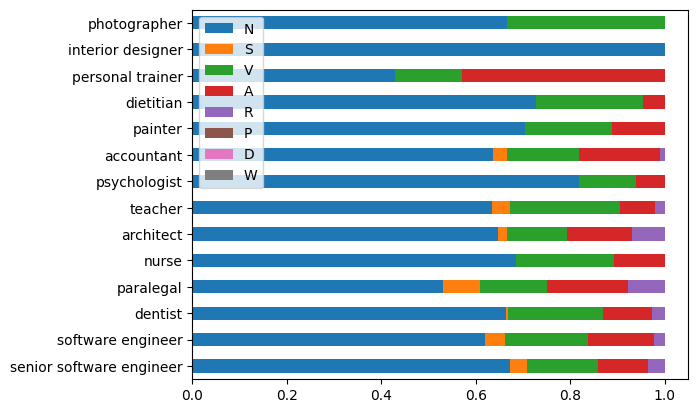

In [9]:
df2.plot(kind='barh', stacked=True)

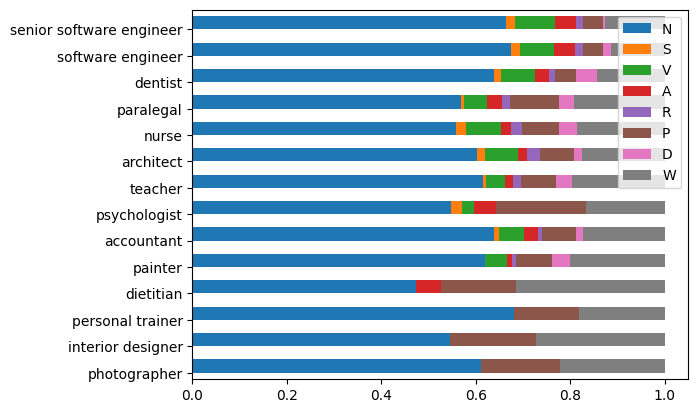

In [81]:
plot = df1.iloc[::-1].plot(kind='barh', position=0, stacked=True)

In [57]:
gg2 = []

for i in range(14):
    gg2 = gg2+[df0[i:i+1:],df2[i:i+1:]]

pd.concat(gg2 )

,N,S,V,A,R,P,D,W
senior software engineer,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
senior software engineer,0.672589,0.035533,0.149746,0.106599,0.035533,0.0,0.0,0.0
software engineer,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
software engineer,0.620202,0.042424,0.175758,0.139394,0.022222,0.0,0.0,0.0
dentist,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
dentist,0.664360,0.003460,0.200692,0.103806,0.027682,0.0,0.0,0.0
paralegal,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
paralegal,0.531250,0.078125,0.140625,0.171875,0.078125,0.0,0.0,0.0
nurse,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
nurse,0.685535,0.000000,0.207547,0.106918,0.000000,0.0,0.0,0.0


In [65]:
gg = []

for i in range(14):
    gg = gg+[df1[i:i+1:],df2[i:i+1:]]

pd.concat(gg )

,N,S,V,A,R,P,D,W
senior software engineer,0.663830,0.019149,0.085106,0.044681,0.014894,0.042553,0.004255,0.125532
senior software engineer,0.672589,0.035533,0.149746,0.106599,0.035533,0.000000,0.000000,0.000000
software engineer,0.673667,0.021002,0.071082,0.043619,0.017771,0.042003,0.016155,0.114701
software engineer,0.620202,0.042424,0.175758,0.139394,0.022222,0.000000,0.000000,0.000000
dentist,0.639456,0.013605,0.071429,0.030612,0.013605,0.044218,0.044218,0.142857
dentist,0.664360,0.003460,0.200692,0.103806,0.027682,0.000000,0.000000,0.000000
paralegal,0.568000,0.008000,0.048000,0.032000,0.016000,0.104000,0.032000,0.192000
paralegal,0.531250,0.078125,0.140625,0.171875,0.078125,0.000000,0.000000,0.000000
nurse,0.558511,0.021277,0.074468,0.021277,0.021277,0.079787,0.037234,0.186170
nurse,0.685535,0.000000,0.207547,0.106918,0.000000,0.000000,0.000000,0.000000


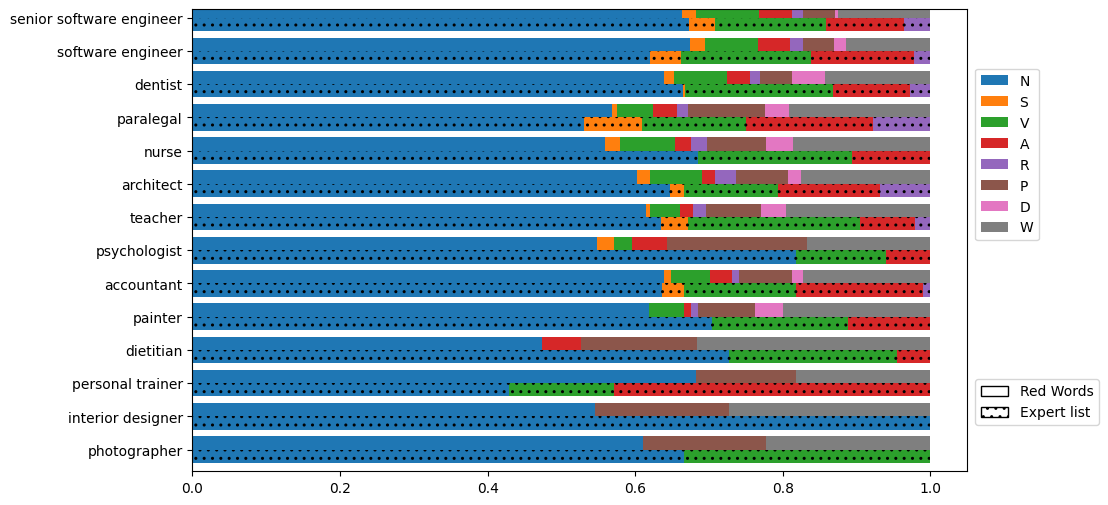

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#plot = plt.figure(figsize=(14, 14), dpi=150)
fig, ax = plt.subplots(figsize=(10, 6))
#fig, ax = plt.subplots( nrows=2, ncols=1, sharey=True)
df0= pd.DataFrame(np.zeros([14,8]),index=list(uk_jobs_test['title'].unique()),columns=list(plot_dict.keys()))

#df1.plot(kind='barh', stacked=True, ax=ax, position=0.5, width= 0.5)
#df2.plot(kind='barh', stacked=True, ax=ax, position=-1, width= 0.25, hatch='//', legend=False)
#df1.iloc[::-1].plot(kind='barh', stacked=True, ax=ax, yticks=[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28], position=0, width= 0.3)
#df0.iloc[::-1].plot(kind='barh', stacked=True, ax=ax, yticks=[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28], position=0, width= 0.2)
#df2.iloc[::-1].plot(kind='barh', stacked=True, ax=ax, yticks=[1,2,3,4,5,6,7,8,9,10,11,12,13,14], position=1, width= 0.3, hatch='//', legend=False)
df1.iloc[::-1].plot(kind='barh', stacked=True, ax=ax, position=0, width= 0.4)
#pd.concat(gg ).iloc[::-1].plot(kind='barh', position=1, stacked=True, ax=ax, width= 0.4,legend=False)
#pd.concat(gg2 ).iloc[::-1].plot(kind='barh', position=1, stacked=True, ax=ax, width= 0.4,  hatch='..', legend=False)
#gg = []

#for i in range(14):
#    pd.concat([df1[i:i+1:],df2[i:i+1:]]).iloc[::-1].plot(kind='barh', position=1, stacked=True, ax=ax, width= 0.4,  hatch='..', legend=False)

#pd.concat(gg )


#df0.iloc[::-1].plot(kind='barh', stacked=True, ax=ax,  position=0.5, width= 0.2,legend=False)
df2.iloc[::-1].plot(kind='barh', stacked=True, ax=ax, position=1, width= 0.4, hatch='..')


white_patch1 = mpatches.Patch(facecolor='white',edgecolor='black',label='Red Words')
white_patch2 = mpatches.Patch(facecolor='white',edgecolor='black' ,hatch='..',label='Expert list')

h,l = ax.get_legend_handles_labels()
l1 = ax.legend(h, l[:8], loc=[1.01, 0.5])
l2 = ax.legend(handles=[white_patch1,white_patch2],loc=[1.01, 0.1])
ax.add_artist(l1)
#ax.legend( ["Red words","Expert list"], loc=[1.01, 0.1])


In [38]:
import matplotlib.pyplot as plt

def plot_clustered_stacked(dfall, labels=None, title=" ",  H=".", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot()

    for df in dfall : # for each data frame
        axe = df.plot(kind="barh",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_ind, n_ind): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_ind]):
            for rect in pa.patches: # for each index
                rect.set_y(rect.get_y() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H*2 * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    #axe.set_yticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    #axe.set_yticklabels(df.index, rotation = 0)
    #axe.set_title(title)

    # Add invisible data to add another legend
    #n=[]        
    #for i in range(n_df):
    #    n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    #l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    #if labels is not None:
    #    labels.pop(1)
    #    l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    #axe.add_artist(l1)
    return axe

In [3]:
for job in  uk_jobs_test['title'].unique():
    print(job)
    print((len([item for sublist in grammar[job].values() for item in sublist])/len(uk_jobs_test[uk_jobs_test['title']==job])))


senior software engineer
5.802469135802469
software engineer
5.951923076923077
dentist
5.25
paralegal
6.578947368421052
nurse
6.714285714285714
architect
5.896551724137931
teacher
5.612903225806452
psychologist
6.0
accountant
6.303030303030303
painter
7.5
dietitian
4.75
personal trainer
4.4
interior designer
3.6666666666666665
photographer
6.0


In [33]:
for job in  uk_jobs_test['title'].unique():
    print(len(uk_jobs_test[uk_jobs_test['title']==job]))

81
104
56
19
28
29
31
7
33
14
4
5
3
3


In [31]:
import pandas as pd

expert_list = pd.read_csv('/home/deepak/RecSys2023/gender_words.tsv', sep=' ')

In [ ]:
ad = uk_jobs_test['description'][188].split(' ')[:400]
for word in expert_list['Masculine'].dropna():
    if '_' not in word and word in ad:
        dist = [word]
    elif '_' not in word and word not in ad:
        dist = []
    else:    
        word = word.replace('_','').lower()
        r = re.compile(word)
        dist = list(filter(r.search, ad))            
    if len(dist)!=0:
        print(dist)
for word in expert_list['Feminine'].dropna():
    if '_' not in word and word in ad:
        dist = [word]
    elif '_' not in word and word not in ad:
        dist = []
    else:    
        word = word.replace('_','').lower()
        r = re.compile(word)
        dist = list(filter(r.search, ad))            
    if len(dist)!=0:
        print(dist)

['ambitions.']
['individual']
['leading', 'leading', 'market-leading']
['depending', 'depending']
['rapid-response']
['support']
['trusted']
['understand']


In [32]:
word_ad_expert = {}
for idx in range(len(uk_jobs_test)):
        ad = uk_jobs_test['description'][idx].split(' ')[:400]
        for word in expert_list['Masculine'].dropna():
            if '_' not in word and word in ad:
                dist = [word]
            elif '_' not in word and word not in ad:
                dist = []
            else:    
                word = word.replace('_','').lower()
                r = re.compile(word)
                dist = list(filter(r.search, ad))            
            if len(dist)!=0:
                job = uk_jobs_test['title'][idx]
                if job not in word_ad_expert.keys():
                    word_ad_expert[job] = []+dist #[word]
                else:
                    word_ad_expert[job] = word_ad_expert[job] + dist  #.append(word)
        for word in expert_list['Feminine'].dropna():
            if '_' not in word and word in ad:
                dist = [word]
            elif '_' not in word and word not in ad:
                dist = []
            else:    
                word = word.replace('_','').lower()
                r = re.compile(word)
                dist = list(filter(r.search, ad))            
            if len(dist)!=0:
                job = uk_jobs_test['title'][idx]
                if job not in word_ad_expert.keys():
                    word_ad_expert[job] = []+dist #[word]
                else:
                    word_ad_expert[job] = word_ad_expert[job] + dist  #.append(word)
        

In [33]:
word_ad_expert['painter']

['individual',
 'commitment',
 'support',
 'individual',
 'commitment',
 'support',
 'individuals',
 'individuals',
 'commitment',
 'support',
 'ambitions.',
 'individual',
 'leading',
 'leading',
 'market-leading',
 'depending',
 'depending',
 'rapid-response',
 'support',
 'trusted',
 'understand',
 'competitive',
 'competitive',
 'individual',
 'Confident',
 'forces-friendly',
 'forces,',
 'forces,',
 'armedforces@.',
 'committed',
 'support']

In [40]:
for job in  word_ad_expert.keys():
    print(job)
    try:
        print((len(word_ad_expert[job])/len(uk_jobs_test[uk_jobs_test['title']==job]),len(word_ad_auto[job])/len(uk_jobs_test[uk_jobs_test['title']==job])))
    except KeyError:
        print((len(word_ad_expert[job])/len(uk_jobs_test[uk_jobs_test['title']==job]),0))


senior software engineer
(5.185185185185185, 0.6419753086419753)
software engineer
(4.980769230769231, 0.5384615384615384)
dentist
(5.339285714285714, 0.39285714285714285)
paralegal
(3.473684210526316, 1.368421052631579)
nurse
(6.107142857142857, 1.1428571428571428)
architect
(3.586206896551724, 1.2413793103448276)
teacher
(8.387096774193548, 1.2258064516129032)
psychologist
(5.0, 2.5714285714285716)
accountant
(3.0303030303030303, 0.9696969696969697)
painter
(2.2142857142857144, 1.0714285714285714)
dietitian
(5.75, 2.5)
personal trainer
(1.4, 1.8)
photographer
(1.0, 0.6666666666666666)
interior designer
(1.3333333333333333, 1.0)


In [20]:
for job in  word_ad_expert.keys():
    print(job)
    try:
        print((len(word_ad_expert[job])/len(uk_jobs_test[uk_jobs_test['title']==job]),len(word_ad_auto[job])/len(uk_jobs_test[uk_jobs_test['title']==job])))
    except KeyError:
        print((len(word_ad_expert[job])/len(uk_jobs_test[uk_jobs_test['title']==job]),0))


senior software engineer
(4.814814814814815, 0.654320987654321)
software engineer
(4.528846153846154, 0.5576923076923077)
dentist
(3.7142857142857144, 0.39285714285714285)
paralegal
(3.9473684210526314, 1.368421052631579)
nurse
(5.25, 1.1428571428571428)
architect
(3.2758620689655173, 1.2758620689655173)
teacher
(5.67741935483871, 1.2580645161290323)
psychologist
(5.571428571428571, 2.5714285714285716)
accountant
(3.9393939393939394, 1.0)
painter
(1.8571428571428572, 1.0714285714285714)
dietitian
(5.75, 2.5)
personal trainer
(2.2, 1.8)
interior designer
(1.3333333333333333, 1.0)
photographer
(1.6666666666666667, 0.6666666666666666)


In [47]:
len(word_ad_expert.keys()),len(word_ad_auto.keys())

(56, 43)

In [50]:
len(word_ad_expert.keys()),len(word_ad_auto.keys())

(56, 25)

In [65]:
len(word_ad_expert.keys()),len(word_ad_auto.keys())

(50, 20)

In [39]:
common_words= []
for words in word_ad_auto.values():
    common_words = common_words+words

In [43]:
from collections import Counter

Counter(common_words)

Counter({'analy': 2,
         'lead': 3,
         'principle': 2,
         'nag': 9,
         'respon': 7,
         'support': 9,
         'understand': 4,
         'autonom': 1,
         'challeng': 1,
         'compet': 3,
         'decision': 1,
         'objective': 1,
         'depend': 3,
         'active': 2,
         'confident': 1,
         'independen': 1,
         'child': 2,
         'commit': 3,
         'trust': 1,
         'logic': 1})

In [12]:
for job in uk_jobs_test['title'].unique():
    if job in word_ad_expert


({'accountant',
  'architect',
  'psychologist',
  'senior software engineer',
  'software engineer'},
 {'senior software engineer', 'software engineer'})

In [27]:
for key in word_ad_auto.keys():
    print(len(set(word_ad_expert[key])),len(set(word_ad_auto[key])))

40 7
40 13
19 8
23 1
28 4
28 2
30 5
17 3
26 4
13 1


In [18]:
unique_red_words = []
for value in grammar.values():
    unique_red_words = unique_red_words+ list(value.values())

In [23]:
len(set([item for sublist in unique_red_words for item in sublist]))

1124

In [39]:
word_ad_auto = {}
for job in word_ad_expert.keys():
        
        for word in expert_list['Masculine'].dropna():
            word = word.replace('_','').lower()
            r = re.compile(word)

            for key in grammar[job].values():
                if len(list(filter(r.search, key)))!=0:
                    if job not in word_ad_auto.keys():
                        word_ad_auto[job] = [word]
                    else:
                        word_ad_auto[job].append(word)

        for word in expert_list['Feminine'].dropna():
            word = word.replace('_','').lower()
            r = re.compile(word)

            for key in grammar[job].values():
                if len(list(filter(r.search, key)))!=0:
                    if job not in word_ad_auto.keys():
                        word_ad_auto[job] = [word]
                    else:
                        word_ad_auto[job].append(word)


In [36]:
import re
auto_grammar = []

red_words_female = {}
for job in uk_jobs_test['title'].unique():
    red_words_female[job] = []
    for word in expert_list['Feminine'].dropna():
        word = word.replace('_','')
        r = re.compile(word.lower())
        for key in grammar[job].keys():
            if len(list(filter(r.search, grammar[job][key])))!=0:
                auto_grammar.append(key)
                red_words_female[job].append(word)


red_words_male = {}
for job in uk_jobs_test['title'].unique():
    red_words_male[job] = []
    for word in expert_list['Masculine'].dropna():
        word = word.replace('_','')
        r = re.compile(word.lower())
        for key in grammar[job].keys():
            if len(list(filter(r.search, grammar[job][key])))!=0:
                auto_grammar.append(key)
                red_words_male[job].append(word)

In [151]:
import itertools

print('F',len(set(itertools.chain.from_iterable(list(red_words_female.values())))))
print('M',len(set(itertools.chain.from_iterable(list(red_words_male.values())))))

F 16
M 21


In [144]:
for key in red_words_male.keys():
    print((key, len(set(red_words_male[key]))))

('architect', 3)
('software engineer', 18)
('interior designer', 0)
('senior software engineer', 17)
('dentist', 8)
('paralegal', 8)
('nurse', 7)
('accountant', 9)
('photographer', 2)
('teacher', 7)
('painter', 1)
('dietitian', 0)
('psychologist', 5)
('personal trainer', 1)


In [145]:
for key in red_words_female.keys():
    print((key, len(set(red_words_female[key]))))

('architect', 4)
('software engineer', 10)
('interior designer', 0)
('senior software engineer', 10)
('dentist', 5)
('paralegal', 7)
('nurse', 6)
('accountant', 6)
('photographer', 0)
('teacher', 11)
('painter', 2)
('dietitian', 2)
('psychologist', 3)
('personal trainer', 0)


In [147]:
for i in set(auto_grammar):
    print((i),auto_grammar.count(i))

s 12
v 36
r 18
a 33
n 100
